<h3> Wait, working on project. Will complete in a week.

In [1]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm

In [ ]:

import tarfile
cifar10_dataset_folder_path = 'cifar-10-batches-py'
class DLProgress(tqdm):
    last_block = 0
    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num
if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
                    'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                    'cifar-10-python.tar.gz',pbar.hook)
if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()     

CIFAR-10 Dataset:   7%|████                                                      | 12.0M/170M [04:53<3:41:00, 12.0kB/s]

In [3]:
!conda install -c conda-forge matplotlib -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\.conda\envs\tensorflowWOrking

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |             py_1           8 KB  conda-forge
    freetype-2.10.0            |       h5db478b_0         478 KB  conda-forge
    kiwisolver-1.0.1           |py37he980bc4_1002          60 KB  conda-forge
    matplotlib-3.0.3           |           py37_0           6 KB  conda-forge
    matplotlib-base-3.0.3      |   py37h3e3dc42_0         6.5 MB  conda-forge
    pyparsing-2.4.0            |             py_0          55 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.1 MB

The following NEW packages will be INSTALLED:

  cycler             conda-forge/noarc

In [5]:
!conda install -c anaconda scikit-learn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\.conda\envs\tensorflowWOrking

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.3        |   py37h343c172_0         5.2 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

  scikit-learn       anaconda/win-64::scikit-learn-0.20.3-py37h343c172_0

The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1b-hfa6e2cd_2 --> anaconda::openssl-1.1.1-he774522_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.3.9~ --> anaconda::ca-certificates-2019.1.23-0
  certifi                              



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.4
  latest version: 4.6.11

Please update conda by running

    $ conda update -n base conda


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(89): Could not remove or rename C:\Users\HP\.conda\envs\tensorflowWOrking\Library\bin\libcrypto-1_1-x64.dll.c~.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(89): Could not remove or rename C:\Users\HP\.conda\envs\tensorflowWOrking\Library\bin\libssl-1_1-x64.dll.c~.  Please remove this file manually (you may need to reboot to free file handles)


In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [7]:
def _load_label_names():
    """
    Load the label names from file
    """
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    """
    Load a batch of the dataset
    """
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels


def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    """
    Display Stats of the the dataset
    """
    batch_ids = list(range(1, 6))

    if batch_id not in batch_ids:
        print('Batch Id out of Range. Possible Batch Ids: {}'.format(batch_ids))
        return None

    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch {}:'.format(batch_id))
    print('Samples: {}'.format(len(features)))
    print('Label Counts: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    print('First 20 Labels: {}'.format(labels[:20]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    label_names = _load_label_names()

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    plt.axis('off')
    plt.imshow(sample_image)


def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    """
    Preprocess data and save it to file
    """
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))


def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    """
    Preprocess Training and Validation Data
    """
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        validation_count = int(len(features) * 0.1)

        # Prprocess and save a batch of training data
        _preprocess_and_save(
            normalize,
            one_hot_encode,
            features[:-validation_count],
            labels[:-validation_count],
            'preprocess_batch_' + str(batch_i) + '.p')

        # Use a portion of training batch for validation
        valid_features.extend(features[-validation_count:])
        valid_labels.extend(labels[-validation_count:])

    # Preprocess and Save all validation data
    _preprocess_and_save(
        normalize,
        one_hot_encode,
        np.array(valid_features),
        np.array(valid_labels),
        'preprocess_validation.p')

    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # load the training data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all training data
    _preprocess_and_save(
        normalize,
        one_hot_encode,
        np.array(test_features),
        np.array(test_labels),
        'preprocess_training.p')


def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]


def load_preprocess_training_batch(batch_id, batch_size):
    """
    Load the Preprocessed Training data and return them in batches of <batch_size> or less
    """
    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_features_labels(features, labels, batch_size)


def display_image_predictions(features, labels, predictions):
    n_classes = 10
    label_names = _load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][0].imshow(feature*255)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])



Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 5:
Image - Min Value: 9 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 2 Name: bird


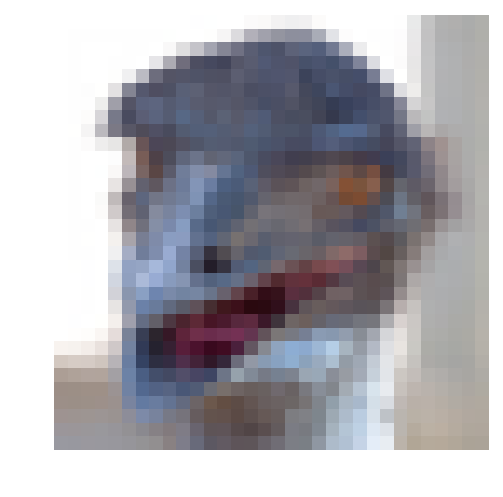

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
cifar10_dataset_folder_path = 'cifar-10-batches-py'

import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 5
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [10]:
import numpy as np

def normalize(x):
    "feature scaling to change range so that convergence is faster"
    
    x = np.array(x)
    x_max = np.max(x)
    x_min = np.min(x)
    output = (x - x_min)/(x_max - x_min)
    
    return output

In [13]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

lb.fit(range(10))

def one_hot_encode(x):
    "One hot encode a list of sample lables. Returns a one-hot encoded vector for each label"
    return lb.transform(x)

In [14]:
#normalizing the data and one hot conecoding and storing the actual data into new format using pickle
preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [15]:
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [17]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """ 
    Return  Tensor for a batch of image input
    image shape: Shape of the images
    return: Tensor for image input
    """
    "In below, None is batch size then shape of image and then image_shape[2] is for RBG"
    return tf.placeholder(tf.float32, shape(None, image_shape[0], image_shape[1], image_shape[2]), name='x')

def neural_net_keep_label_input(n_classes):
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability
    """
    
    return tf.placeholder(tf.float32, shape(None, n_classes), name='y')

def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    return
    """
    
    return tf.placeholder(tf.float32, shape(None), name='keep_prob')

tf.reset_default_graph()